In [15]:
import pandas as pd
import numpy as np
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt
from numbers import Number
from time import time
from ta import momentum as mo
from ta import volume as vo
from ta import trend as tr
from numpy.random import seed
seed(1)
tf.random.set_seed(2)

In [16]:
year = 31536000
period1 = round(time() - (year * 5))
period2 = round(time())
asset = 'aapl'

hist_data = pd.read_csv(
    f'https://query1.finance.yahoo.com/v7/finance/download/{asset}?period1={period1}&period2={period2}&interval=1d&events=history&includeAdjustedClose=true')

In [17]:
# ROC de Y em relação a X
def change(x, y):
    if len(x) == len(y):
        change_arr = []
        for i in range(0, len(x)):
            if isinstance(x[i], Number) and isinstance(y[i], Number):
                change_arr.append(((y[i] - x[i]) / x[i]) * 100)
            else:
                change_arr.append('NaN')

        return change_arr
    else:
        print(f"Error: x length {len(x)}, y length {len(y)}")

In [18]:
# print(change([1, 2],[2, 1])) # [100.0, -50.0] Yn > Xn se valor positivo
trend_window = 2
slice_start = 50
slice_plus = 0

roc = mo.roc(hist_data['Close'], window=25)
rsi = mo.rsi(hist_data['Close'])
stochrsi = mo.stochrsi(hist_data['Close'])
stochrsi_d = mo.stochrsi_d(hist_data['Close'])
stochrsi_k = mo.stochrsi_k(hist_data['Close'])

tsi = mo.tsi(hist_data['Close'])
tsi_signal = tr.ema_indicator(tsi, window=13)

macd = tr.macd(hist_data['Close'])
macd_diff = tr.macd_diff(hist_data['Close'])
macd_signal = tr.macd_signal(hist_data['Close'])

stoch = mo.stoch(hist_data['High'], hist_data['Low'], hist_data['Close'])
ema_w8 = tr.ema_indicator(hist_data['Close'], window=8)
ema_w20 = tr.ema_indicator(hist_data['Close'], window=20)

sma_w13 = tr.sma_indicator(hist_data['Close'], window=13)
sma_w25 = tr.sma_indicator(hist_data['Close'], window=25)

roc_close_ema_w8 = change(ema_w8, hist_data['Close'])
roc_ema_w8_ema_w20 = change(ema_w20, ema_w8)
roc_close_ema_w20 = change(ema_w20, hist_data['Close'])
roc_close_open = change(hist_data['Open'], hist_data['Close'])

roc_close_sma_w13 = change(sma_w13, hist_data['Close'])
roc_sma_w13_sma_w25 = change(sma_w25, sma_w13)
roc_close_sma_w25 = change(sma_w25, hist_data['Close'])

trend = mo.roc(hist_data['Close'], window=trend_window).map(lambda n : 'HIGH' if n > 0 else 'LOW')

df = pd.DataFrame({
    'close': np.array(list(hist_data['Close'][slice_start:-(trend_window + slice_plus)])),
    # 'roc': np.array(list(roc[slice_start:-(trend_window + slice_plus)])),
    'rsi': np.array(list(rsi[slice_start:-(trend_window + slice_plus)])),
    # 'stoch': np.array(list(stoch[slice_start:-(trend_window + slice_plus)])),
    # 'stochrsi': np.array(list(stochrsi[slice_start:-(trend_window + slice_plus)])),
    # 'stochrsi_d': np.array(list(stochrsi_d[slice_start:-(trend_window + slice_plus)])),
    # 'stochrsi_k': np.array(list(stochrsi_k[slice_start:-(trend_window + slice_plus)])),
    'macd': np.array(list(macd[slice_start:-(trend_window + slice_plus)])),
    'macd_diff': np.array(list(macd_diff[slice_start:-(trend_window + slice_plus)])),
    'macd_signal': np.array(list(macd_signal[slice_start:-(trend_window + slice_plus)])),
    # 'tsi': np.array(list(tsi[slice_start:-(trend_window + slice_plus)])),
    # 'tsi_signal': np.array(list(tsi_signal[slice_start:-(trend_window + slice_plus)])),
    'ema_w8': np.array(list(ema_w8[slice_start:-(trend_window + slice_plus)])),
    'ema_w20': np.array(list(ema_w20[slice_start:-(trend_window + slice_plus)])),
    # 'roc_close_ema_w8': np.array(list(roc_close_ema_w8[slice_start:-(trend_window + slice_plus)])),
    # 'roc_ema_w8_ema_w20': np.array(list(roc_ema_w8_ema_w20[slice_start:-(trend_window + slice_plus)])),
    # 'roc_close_ema_w20': np.array(list(roc_close_ema_w20[slice_start:-(trend_window + slice_plus)])),

    # 'roc_close_sma_w13': np.array(list(roc_close_sma_w13[slice_start:-(trend_window + slice_plus)])),
    # 'roc_sma_w13_sma_w25': np.array(list(roc_sma_w13_sma_w25[slice_start:-(trend_window + slice_plus)])),
    # 'roc_close_sma_w25': np.array(list(roc_close_sma_w25[slice_start:-(trend_window + slice_plus)])),
    'trend': np.array(list(trend[(slice_start + trend_window)::]))
})

df

,close,rsi,macd,macd_diff,macd_signal,ema_w8,ema_w20,trend
0,28.797501,63.934059,0.102216,0.155492,-0.053276,28.148508,27.916857,HIGH
1,28.797501,63.934059,0.157148,0.168339,-0.011191,28.292728,28.000728,HIGH
2,28.955000,65.764469,0.210959,0.177720,0.033239,28.439900,28.091611,HIGH
3,28.992500,66.204265,0.253705,0.176374,0.077332,28.562700,28.177410,HIGH
4,29.160000,68.171083,0.297667,0.176268,0.121399,28.695433,28.270990,HIGH
...,...,...,...,...,...,...,...,...
1202,146.830002,46.442405,-0.792639,-0.901320,0.108680,146.693401,148.251654,LOW
1203,146.919998,46.678951,-0.780396,-0.711261,-0.069135,146.743756,148.124829,LOW
1204,145.369995,43.144570,-0.885557,-0.653137,-0.232419,146.438476,147.862464,LOW
1205,141.910004,36.500707,-1.233866,-0.801158,-0.432709,145.432149,147.295563,LOW


In [19]:
train = df.iloc[0:-100,0::].sample(frac=1)
# val = df.iloc[-200:-100,0::]
test = df.iloc[-100::,0::]

# x_train = tf.keras.utils.normalize(train.iloc[:,0:-1], axis=-2, order=2).values
x_train = train.iloc[:,0:-1].values
y_train = train.iloc[:,-1].map({'LOW': 0, 'HIGH': 1}).values

# x_val = df.iloc[:,0:-1]
# y_val = df.iloc[:,-1].map({'LOW': 0, 'HIGH': 1})

x_test = test.iloc[:,0:-1].values
y_test = test.iloc[:,-1].map({'LOW': 0, 'HIGH': 1}).values

In [20]:
# Model 1
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(x_train.shape[1],)),
#     tf.keras.layers.Dense(15, activation=tf.nn.relu),
#     tf.keras.layers.Dense(20, activation=tf.nn.relu),
#     tf.keras.layers.Dense(2)
# ])
# model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
# )
# history = model.fit(x_train, y_train, epochs=200, validation_data=(x_val,y_val))

# Model 2
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
# x_val = x_val.reshape(x_val.shape[0], x_val.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(64, 6, activation=tf.nn.relu, input_shape=(x_train.shape[1],x_train.shape[2])),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(20, activation=tf.nn.relu),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2),
])

# model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
# )
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])
history = model.fit(x_train, y_train, batch_size=4, epochs=200)

Epoch 1/200
277/277 [==============================] - 1s 1ms/step - loss: 0.8741 - accuracy: 0.5818
Epoch 2/200
277/277 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5818
Epoch 3/200
277/277 [==============================] - 0s 1ms/step - loss: 0.7070 - accuracy: 0.5818
Epoch 4/200
277/277 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5818
Epoch 5/200
277/277 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5818
Epoch 6/200
277/277 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5818
Epoch 7/200
277/277 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5818
Epoch 8/200
277/277 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5818
Epoch 9/200
277/277 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5808
Epoch 10/200
277/277 [==============================] - 0s 1ms/step - loss: 0.6931 - accura

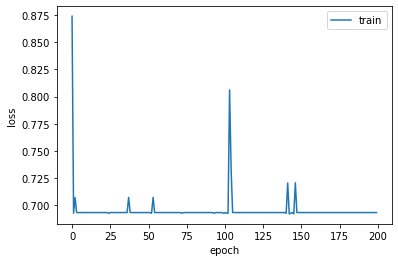

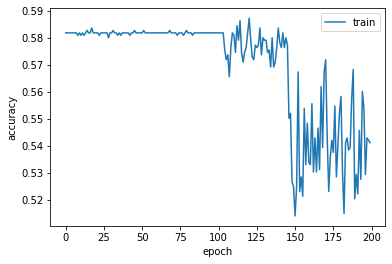

In [21]:
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'])
plt.show()

plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'])
plt.show()

4/4 [==============================] - 0s 998us/step - loss: 0.6931 - accuracy: 0.4400
Teste:
 [0.6931471824645996, 0.4399999976158142]


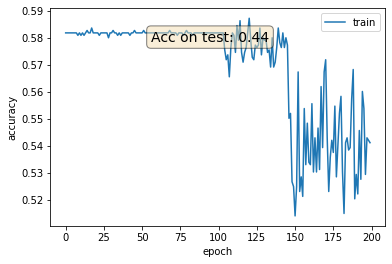

In [22]:
test = model.evaluate(x_test,y_test)
print("Teste:\n",test)
loss,acc = test

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.3, 0.90, "Acc on test: %.2f" % acc,  fontsize=14, transform=plt.axes().transAxes, 
        verticalalignment='top', bbox=props)

plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'])

plt.show()